In [8]:
import albumentations as A
import cv2 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import segmentation_models as sm
sm.set_framework('tf.keras')

def predict(model,image_path):
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    _img = img.astype('float32')
    
    def get_validation_augmentation():
        test_transform = [
            A.Resize(512,512,always_apply=True),
            A.Normalize(always_apply=True)
        ]
        return A.Compose(test_transform)

    transformed = get_validation_augmentation()(image=_img)
    t_img = transformed['image']
    nt_img = np.expand_dims(t_img,0)
    
    y = model(nt_img)
    y = y.numpy()
   
    plt.figure(figsize=(16,16))
    plt.subplot(1,2,1)
    plt.imshow((t_img-np.min(t_img))/(np.max(t_img)-np.min(t_img)))
    
    plt.subplot(1,2,2)
    plt.imshow(y[0])
    
    plt.show()

In [13]:
n_classes = 4
dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.BinaryFocalLoss() if n_classes == 1 else sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)
metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]
 #custom_objects={'iou_score':metrics[0],'f1-score':metrics[1],'loss':total_loss,'val_loss':total_loss})

In [17]:
model =  tf.keras.models.load_model('saved_model/my_model',compile=False)

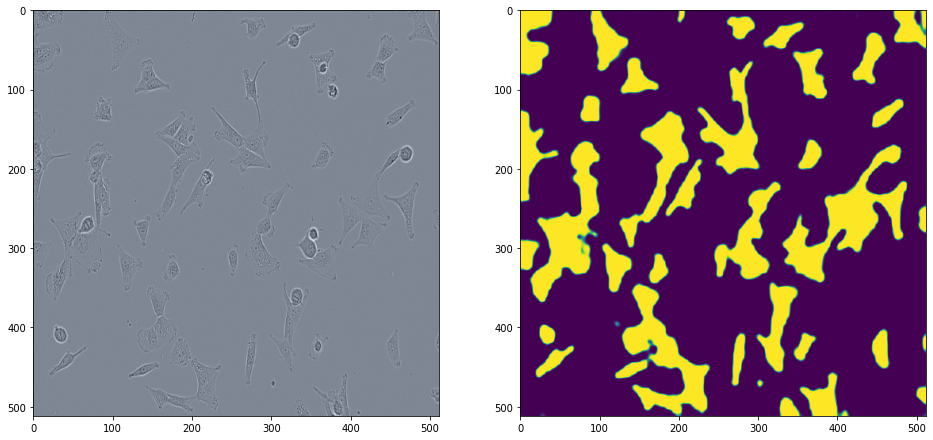

In [18]:
predict(model,r'livecell_test_images\A172_Phase_C7_1_00d08h00m_4.tif')